In [ ]:
# Installations
!pip install -U scikit-fuzzy

# Imports
import skfuzzy as fuzz
import numpy as np
from skfuzzy import control as ctrl

In [50]:
# Antecedents and Consequents
speed = ctrl.Antecedent(np.arange(1, 46, 1), 'speed') # m/s
mass = ctrl.Antecedent(np.arange(1, 2501, 1), 'mass') # kg
acceleration = ctrl.Antecedent(np.arange(0, 6, 1), 'acceleration') # m/s^2
distance = ctrl.Antecedent(np.arange(1, 501, 1), 'distance') # m
breaking_pressure = ctrl.Consequent(np.arange(0, 2000, 1), 'breaking_pressure') # psi

# Membership Functions
speed.automf(names = ["slow", "steady", "fast"])
mass.automf(names = ["light", "average", "heavy"])
acceleration.automf(names = ["no acceleration", "moderate acceleration", "fast acceleration"])
distance.automf(names = ["far away", "average", "close by"])
breaking_pressure["no pressure"] = fuzz.gaussmf(breaking_pressure.universe, mean = 500, sigma = 250)
breaking_pressure["moderate pressure"] = fuzz.gaussmf(breaking_pressure.universe, mean = 1000, sigma = 250)
breaking_pressure["heavy pressure"] = fuzz.gaussmf(breaking_pressure.universe, mean = 1500, sigma = 250)

In [51]:
# Rules
rule1 = ctrl.Rule(antecedent=((distance["far away"] & mass["average"]) |
                              (distance["average"] & speed["slow"]) |
                              (acceleration["no acceleration"] & mass["light"])),
                  consequent = breaking_pressure["no pressure"], label = "rule no pressure")

rule2 = ctrl.Rule(antecedent=((distance["average"] & acceleration["fast acceleration"]) |
                              (speed["fast"] & distance["average"]) |
                              (distance["far away"] & mass["heavy"] & speed["slow"]) |
                              (distance["average"] & mass["average"]) |
                              (acceleration["moderate acceleration"] & distance["average"]) | 
                              (mass["average"] & distance["average"])),
                  consequent = breaking_pressure["moderate pressure"], label = "rule moderate pressure")

rule3 = ctrl.Rule(antecedent=((distance["close by"] & mass["heavy"]) |
                              (distance["close by"] & mass["average"]) |
                              (speed["fast"] & mass["average"] & distance["close by"]) |
                              (distance["average"] & mass["heavy"])),
                  consequent = breaking_pressure["heavy pressure"], label = "rule heavy pressure")
system = ctrl.ControlSystem(rules=[rule1, rule2, rule3])

# Visualie Rules
# rule1.view()
# rule2.view()
# rule3.view()

900.5875041831326 psi


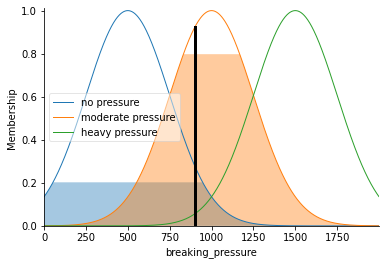

In [52]:
# Simulation
  # Speed = 1-45 m/s
  # Mass = 1-2500 kg
  # Distance = 1-500 m
  # Acceleration = 0-5 m/s^2
  # Breaking Pressure = 0-2000 psi
simulation = ctrl.ControlSystemSimulation(system)
simulation.input['speed'] = 30
simulation.input['mass'] = 1000
simulation.input['distance'] = 200
simulation.input['acceleration'] = 1
simulation.compute()
print(simulation.output["breaking_pressure"], "psi")
breaking_pressure.view(sim = simulation)
